## Perform Chi-Square test for Bank Churn prediction (find out different patterns on customer leaves the bank)  . Here I am considering only few columns to make things clear

### Import libraries

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Get the data

In [2]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
churn_df.CreditScore.value_counts()

850    233
678    63 
655    54 
705    53 
667    53 
       .. 
419    1  
417    1  
373    1  
365    1  
401    1  
Name: CreditScore, Length: 460, dtype: int64

In [11]:
churn_df.EstimatedSalary.value_counts()

24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64

In [10]:
churn_df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4     989 
9     984 
6     967 
10    490 
0     413 
Name: Tenure, dtype: int64

In [13]:
# user is with bank for 9 months --> tenure 1
# user is with bank for 13 months---> tenure 2

In [14]:
churn_df.shape

(10000, 14)

In [15]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Here we have 4 category predictors and one category response. Exited, the response column represnts customer left the bank or not.

## Before performig Ch-Square test we have to make sure data is label encoded.

In [25]:
label_encoder = LabelEncoder()
label_encoder.fit(churn_df['Geography'])

# types of encoding


churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])
churn_df['Surname'] = label_encoder.fit_transform(churn_df['Surname'])

In [26]:
churn_df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [27]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Chi-Square test 

In [28]:
from sklearn.feature_selection import chi2

In [34]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [29]:
X = churn_df.drop('Exited',axis=1)
y = churn_df['Exited']

In [36]:
categorical_columns = ["Surname", "Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]

In [30]:
chi_scores = chi2(X, y)

In [31]:
chi_scores

(array([4.57638152e+03, 1.28730837e+02, 5.56133225e+02, 1.05403468e+02,
        1.18532506e+01, 5.15399263e+01, 2.30041748e+03, 3.27053797e+00,
        7.15130278e+06, 5.05539429e+00, 1.50040970e-01, 1.18199414e+02,
        4.83508818e+04]),
 array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
        5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
        0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
        0.00000000e+000]))

In [40]:
X.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [39]:
chi_scores[1]

array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
       5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
       0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
       0.00000000e+000])

In [41]:
p_values

HasCrCard          6.984962e-01 
Tenure             7.053449e-02 
NumOfProducts      2.454940e-02 
Geography          5.756078e-04 
Gender             7.015575e-13 
CreditScore        9.963536e-25 
IsActiveMember     1.568036e-27 
CustomerId         7.766801e-30 
Surname            5.831468e-123
EstimatedSalary    0.000000e+00 
Balance            0.000000e+00 
Age                0.000000e+00 
RowNumber          0.000000e+00 
dtype: float64

### here first array represents chi square values and second array represnts p-values

In [37]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

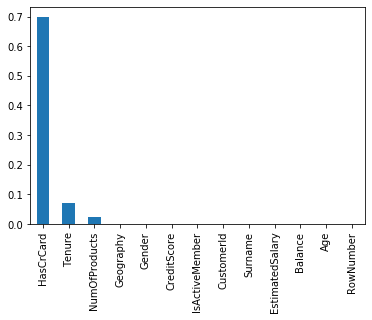

In [38]:
p_values.plot.bar()

# Since HasCrCard has higher the p-value, it says that this variables is independent of the repsone --> Exited and can not be considered for model training